In [1]:
import loader
import cv2
import numpy as np
import pickle

In [2]:
import matplotlib.pyplot as plt
import random
def plot_gallery(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[r]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

def plot_gallery_norand(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
#         r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[i]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

In [3]:
loc_collection = 'Auto_Collection_Gray/'
# shape = 'Square'
shape = 'No_Margin'
char_list_nameonly = [
    'Alif‬', 'Bā’', 'Tā’', 'Ṡā’‬', 'Jīm', 'h_Ḥā’‬', 'Khā’‬',
    'Dāl‬', 'Żāl‬', 'Rā’‬', 'zai‬', 'sīn‬', 'syīn‬', 's_ṣād',
    'd_ḍād'
    , 't_ṭā’‬', 'z_ẓȧ’‬', '‘ain', 'gain‬', 'fā’‬', 'qāf‬',
    'kāf‬', 'lām‬', 'mīm‬', 'nūn‬', 'wāw‬', 'hā’‬', 'yā’‬'
]
sameratio_keepform, diffratio_keepform, sameratio_diffform, diffratio_diffform = loader.main(loc_collection, shape)

print(sameratio_keepform.keys())
print(diffratio_keepform.keys())
print(sameratio_diffform.keys())
print(diffratio_diffform.keys())

All files are .png
sibh=  30 122
sibw=  106 16
libh=  288 131
libw=  144 313
ratio_to_sibh=  0.10416666666666667
ratio_to_sibw=  0.051118210862619806
ratio_to_32_bh=  0.1111111111111111
ratio_to_32_bw=  0.10223642172523961
dict_keys(['sk_32_bh', 'sk_32_bw', 'sk_sibh', 'sk_sibw', 'sk_largest'])
dict_keys(['dk_32', 'dk_sibh', 'dk_sibw', 'dk_libh', 'dk_libw'])
dict_keys(['sd_32', 'sd_smallest', 'sd_largest'])
dict_keys(['dd_32', 'dd_sibh', 'dd_sibw', 'dd_libh', 'dd_libw'])


In [151]:
data_dk = []
label_dk = []
for i in range(0,28):
    for x in range(len(diffratio_keepform['dk_32'][i])):
        gd = diffratio_keepform['dk_32'][i][x]
        data_dk.append(diffratio_keepform['dk_32'][i][x])
        label_dk.append(i)
data_dk = np.array(data_dk)
label_dk = np.array(label_dk)

data_sk = []
data_sk_temp = []
label_sk = []
for i in range(0,28):
    for x in range(len(sameratio_keepform['sk_32_bh'][i])):
        data_sk_temp.append(sameratio_keepform['sk_32_bh'][i][x])
        label_sk.append(i)
for x in data_sk_temp:
    y = list(data_sk_temp[0].ravel())
    y = np.array(y)
    data_sk.append(y.reshape(32, 32))
data_sk = np.array(data_sk)
label_sk = np.array(label_sk)

data_sd = []
label_sd = []
for i in range(0,28):
    for x in range(len(sameratio_diffform['sd_32'][i])):
        data_sd.append(sameratio_diffform['sd_32'][i][x])
        label_sd.append(i)
data_sd = np.array(data_sd)
label_sd = np.array(label_sd)

data_dd = []
label_dd = []
for i in range(0,28):
    for x in range(len(diffratio_diffform['dd_32'][i])):
        data_dd.append(diffratio_diffform['dd_32'][i][x])
        label_dd.append(i)
data_dd = np.array(data_dd)
label_dd = np.array(label_dd)

sameratio_keepform


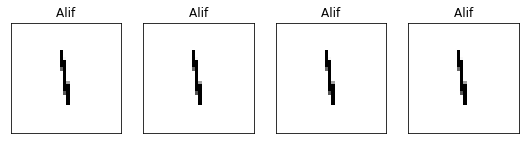

diffratio_keepform


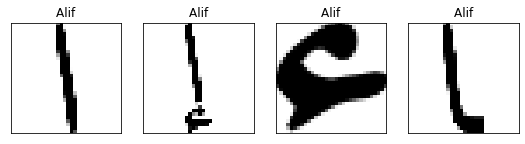

sameratio_diffform


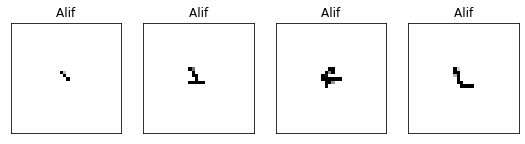

diffratio_diffform


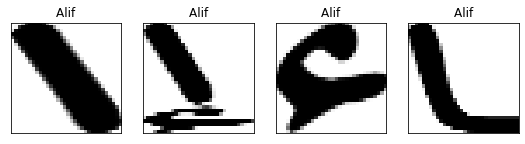

In [152]:
print('sameratio_keepform')
plot_gallery_norand(data_sk, label_sk, 1, 4)
print('diffratio_keepform')
plot_gallery_norand(data_dk, label_dk, 1, 4)
print('sameratio_diffform')
plot_gallery_norand(data_sd, label_sd, 1, 4)
print('diffratio_diffform')
plot_gallery_norand(data_dd, label_dd, 1, 4)

In [154]:
from sklearn.model_selection import train_test_split
test_size = 0.25
random_state = 52

data_train, data_test, y_train, y_test = train_test_split(
data_sk, label_dk, test_size=test_size,random_state=random_state)

In [155]:
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255

In [156]:
data_train.shape

(1361, 32, 32, 1)

In [160]:
data_dd

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 244,  42, ..., 255, 255, 255],
        [224,  10,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,   0,   3,  61],
        [255, 255, 255, ...,   3,  52, 248],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255,  89, ..., 255, 255, 255],
        [223,  28,   0, ..., 255, 255, 255],
        [ 32,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 253, 132, ..., 238, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

## LeNet-5

In [ ]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.model_selection import StratifiedKFold
import numpy
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
# earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
#                              patience=10, verbose=1, mode='auto')
# earlystopper = EarlyStopping(monitor='val_accuracy', min_delta=0,
#                              patience=5, verbose=1, mode='auto')
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=10, verbose=1, mode='auto')
# tensorboard = TensorBoard(log_dir='./tensorboard_brandnew')
# checkpointer = ModelCheckpoint(#filepath='./ModelCheckpoint/weights_brandnew.hdf5',
#                                filepath='./ModelCheckpoint/model.{epoch:02d}-{val_loss:.2f}.h5',
#                                verbose=1, save_best_only=True)

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    model = Sequential()
    #Layer 1
    #Conv Layer 1
    model.add(Conv2D(filters = 6,  kernel_initializer='he_normal', kernel_regularizer='l2',
                     kernel_size = 5, 
                     strides = 1, 
                     activation = 'relu', 
                     input_shape = (32,32,1)))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    #Pooling layer 1
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    #Layer 2
    #Conv Layer 2
    model.add(Conv2D(filters = 16, kernel_initializer='he_normal',
                     kernel_size = 5,
                     strides = 1,
                     activation = 'relu',
                     input_shape = (14,14,6)))
#     model.add(Dropout(0.1))
#     model.add(BatchNormalization())
    #Pooling Layer 2
    model.add(MaxPooling2D(pool_size = 2, strides = 2))
    #Flatten
    model.add(Flatten())
#     model.add(BatchNormalization())
    #Layer 3
    #Fully connected layer 1
    model.add(Dense(units = 120, activation = 'relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
    model.add(Dropout(0.1))
    #Layer 4
    #Fully connected layer 2
    model.add(Dense(units = 84, activation = 'relu', kernel_initializer='normal'))
    model.add(Dropout(0.1))
#     model.add(BatchNormalization())
    #Layer 5
    #Output Layer
    model.add(Dense(units = 28, activation = 'softmax'))

    # Compile model
    model.compile(optimizer = 'RMSProp', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # Fit the model
#     model.fit(X[train], y_cat[train], epochs=8, batch_size=16, verbose=1)
    h = model.fit(X[train] ,y_cat[train], epochs = 64,
                    batch_size = 16, 
                    validation_data = [X[test], y_cat[test]],
                    )
#                       callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = 'best_model_LeNet.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('saved_kfold_model_temp')
    filename = 'leNet_'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))